
<img src="./logo_UTN.svg" align="right" width="150" /> 
 Teoría de Circuitos II

# Trabajo semanal 4
#### Israel Pavelek



Los sistemas de antenas de transmisión de tipo Phased Array, son un tipo particular de antena que permiten controlar la dirección del haz emitido sin desplazamientos mecánicos. Se trata en esencia de múltiples antenas que reciben la misma señal de entrada, aunque afectada por desfasajes diferentes. Así, modificando los desfasajes y por efectos de interferencia constructiva o destructiva, se logra modificar el ángulo de apuntamiento sin requerir desplazamientos mecánicos.
 
Se desea diseñar desfasadores pasivos para un sistema de este tipo que opera en banda ancha, buscándose que no alteren la respuesta de módulo de la señal.
 
 
* a) Proponga una función transferencia normalizada de primer orden que permita rotar la fase, sin alterar el módulo. Dibuje 1) el diagrama de polos y ceros,  2) la respuesta de fase en función de la frecuencia y 3) calcule el retardo de grupo.
 
 
* b) Proponga una topología activa y una pasiva que implementen el diagrama de polos y ceros del punto anterior. Obtenga los valores de componentes pasivos (resistencias y capacitores) para lograr que la rotación de fase sea de 15º en ω=1 (medida respecto de la fase en ω=0).
 


Para ser una circuito de primero orden, y que el filtro no modifique la transferencia de modulo ubicamos un cero en el semiplano derecho a la misma distancia que el único polo sobre el eje $\sigma$

$$T(s)=\frac{s-a}{s+a}$$

$$T(j\omega)=\frac{j\omega-a}{j\omega+a}$$

$$|T(j\omega)|= \frac{\sqrt{\omega^2+a^2}}{\sqrt{\omega^2+a^2}}=1 $$

$$\phi(j\omega)=\pi + arctg(-\frac{-\omega}{a})-arctg(-\frac{\omega}{a}) $$

Recordemos que como el cero está en el semiplano derecho tenemos un aporte de $\pi$ en su fase

Como $arctg(x)=-arctg(-x)$ funcion impar

$$\phi(j\omega)=\pi -2 arctg(\frac{\omega}{a})$$

Retardo de grupo:

$$\tau=-\frac{d\phi}{dt}=2 \cdot \frac{1}{1+(\frac{\omega}{a}^2) }\cdot  \frac{1}{a}$$

$$\tau=\frac{2}{a} \cdot \frac{1}{1+(\frac{\omega}{a}^2) }$$


### Implementación 

Para poder buscar una cero en el semiplano derecho implementamos una red del tipo puente, y dado que tiene que ser de primer orden proponemos que posea un solo elemento reactivo (capacitor):

Red propuesta:

<img src="./circuito1.png" align="center" width="400" /> 

Redibujado:

<img src="./circuito1b.png" align="center" width="400" /> 

$$T(s)=\frac{R}{2R}-\frac{R}{R+\frac{1}{sC}} $$

$$T(s)=\frac{R^2+\frac{R}{sC}-2R^2}{2R^2+\frac{2R}{sC}} $$

$$T(s)=-\frac{sCR^2-R}{2sCR^2+2R} $$

$$T(s)=-\frac{1}{2}\frac{sCR-1}{sCR+1} $$

$$T(s)=-\frac{1}{2}\frac{s-\frac{1}{CR}}{s+\frac{1}{CR}} $$





Para el valor de los componentes 

Como nuestro circuito ademas agrega 180º de fase tenemos que la fase es

$$\phi(j\omega)=2 arctg(\omega RC)$$

Nos pide que para $\omega=1\frac{rad}{seg}$ la fase sea de 15º menos 

Por lo tanto 

$\frac{15º}{2}=arctg(RC)$

si hacemos que C=1

$tg(7,5)=R$

R=0,13

Circuito y simulación:

<img src="./simu1.png" align="center" width="500" />

Para implementarlo con un circuito activo propongo el siguiente circuito:

<img src="./ej1activo.png" align="center" width="500" />

El análisis de este circuito lo hicimos en el TP1 por lo tanto traemos sus expresiones:

Siendo todos los resistores de valor R

$$T(s)= -\frac{s-\frac{1}{CR}}{s+\frac{1}{CR}} $$

Cuyo modulo es unitario y la fase:

$$\phi(j\omega)=2 arctg(\omega RC)$$

Idem al circuito anterior

<img src="./simu2.png" align="center" width="500" />



## Ejercicio 2

Considere la siguiente expresión generalizada de una transferencia bicuadrática:

$$T(s)= K \cdot \frac{s^2+s\cdot \frac{\omega_n}{Q_n}+\omega_n^2}{s^2+s\cdot \frac{\omega_p}{Q_p} +\omega_p^2} $$

a) Considerando que el denominador de T(s) se corresponde con el de un filtro pasa-altos Butterworth de segundo orden, especifique las condiciones necesarias para los parámetros k, Qn, ωn, Qp, y ωP de forma tal que la transferencia final resulte:

a1) Notch normalizado pasabajos			

<img src="./enun1.png" align="center" width="300" />


a2) Eliminabanda normalizado

<img src="./enun2.png" align="center" width="300" />

En cada caso, grafique además el diagrama de polos y ceros, detallando las coordenadas de todas las singularidades.

b) Proponga sendos circuitos normalizados (de ser posible, pasivos) que sintetizan cada uno de los filtros

c) En cada caso, desnormalice los circuitos del punto b) de forma tal que la frecuencia donde la transferencia de módulo alcanza su mínimo sea de 1kHz.


Si el denominador corresponde a un filtro Butterworth y vemos que en los graficos se encuentra normalizado tenemos que:


$${s^2+s\cdot \frac{\omega_p}{Q_p} +\omega_p^2}= {s^2+\sqrt(2)s+1}$$

En donde vemos que $\omega_p=1$ y $Q_p=\frac{1}{\sqrt{2}}$


En el numerador para el primer caso vemos que posee un cero para $\omega=2$ y al ser un filtro notch pasa bajo nos queda: 

$$T(s)= \frac{s^2+4}{s^2+\sqrt(2)s+1} $$

Teniendo en cuenta que para $\omega=\inf$ la ganancia es unitaria y que para $\omega=0$ la ganancia es 4, que traducido a dB son 12 dB aproximadamente, por lo tanto K=1

En el segundo caso:

tenemos que el filtro notch tambien está normalizado, y como su ganancia en continua y en infinito son 0  K=1 lo que queda:

$$T(s)= \frac{s^2+1}{s^2+\sqrt(2)s+1} $$

Veamos sus respuestas para verificar:

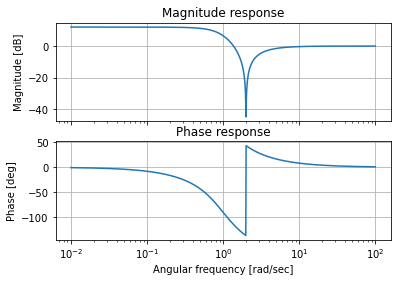

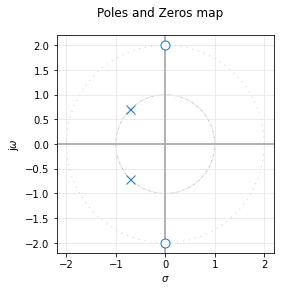

In [19]:
import scipy.signal as sig
import matplotlib as mpl
from splane import *

num=[1,0,4]
den=[1,1.41,1]

all_sys=(sig.TransferFunction(num,den))
filter_names=("Filtro")

fig_id, axes_hdl = bodePlot(all_sys, 1, ())
analog_fig_id, analog_axes_hdl = pzmap(all_sys, filter_names, 3, ())

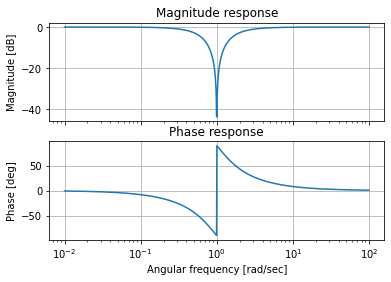

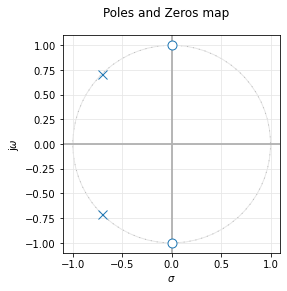

In [20]:
import scipy.signal as sig
import matplotlib as mpl
from splane import *

num=[1,0,1]
den=[1,1.41,1]

all_sys=(sig.TransferFunction(num,den))
filter_names=("Filtro")

fig_id, axes_hdl = bodePlot(all_sys, 1, ())
analog_fig_id, analog_axes_hdl = pzmap(all_sys, filter_names, 3, ())

Circuito propuesto:

<img src="./2a.png" align="center" width="300" />

Cuya transferencia es:

$$T(s)=A\frac{s^2+s\cdot\frac{1}{RC} \cdot \frac{D}{A}+\frac{1}{LC} \cdot \frac{B}{A}}{s^2+s \cdot \frac{1}{RC}+\frac{1}{LC}} $$

$\frac{1}{LC}=1$

Si L=1 y C=1

Nos queda determinar R

$\sqrt{2}=\frac{1}{R}$

$R=0.707$

Para que el circuito responda con la transferencia pedida D=0, para anular el termino lineal del numerador, luego vemos que $\frac{B}{A}=4$ pero hay que tener en cuenta que tanto B como A deben ser menor a la unidad, por lo tanto de aca proponemos que A=0,25 y que B=1, esto nos implica que debemos amplificar el circuito para poder cumplir con el pedido y tener una ganancia de 4 veces.

En definitiva el circuito nos queda:

<img src="./simu2a.png" align="center" width="300" />


Para el segundo circuito es más sencillo dado que $\omega_n=\omega_p$ por lo tanto no necesitamos activar el circuito, los valores de L C y R son los mismos que en el circuito anterior quedando:

<img src="./2b.png" align="center" width="300" />


Desnormalizamos los circuitos para $\omega=2\pi 1KHz$ y tomamos una norma de impendancia de 1K$\Omega$

$C'=\frac{C}{2\pi1KHz 1K\Omega}$

$R'=R \cdot 1K\Omega$

$L'=\frac{L \cdot 1K\Omega}{2\pi1KHz}$

Quedan entonces los circuitos y sus simulaciones:

<img src="./simu1desnorm.png" align="center" width="300" />


<img src="./simu2desnorm.png" align="center" width="300" />




### Ejercico 3

Dada la siguiente respuesta de fase de una transferencia:

$$\phi(\omega)=\frac{\pi}{2}-arctg(\frac{6\omega}{-\omega^2+4}) $$


* a) Obtener la expresión de F(s)
* b) Graficar el diagrama de polos y ceros, y con el mismo, verificar la respuesta de fase en extremos de banda
* c) Obtener un circuito equivalente pasivo que implemente dicha respuesta


El aporte de $\frac{\pi}{2}$ es producto de un cero ubicado en el origen, veamos ahora el resto de la fase. 

Dado que el arctg es una funcion impar podemos tambien escribir la fase como:

$$\phi(\omega)=\frac{\pi}{2}+arctg(\frac{-6\omega}{-\omega^2+4}) $$

Veamos..

$$\phi(j\omega)=arctg(\frac{Img(F(j\omega))}{Real(F(j\omega))})$$

$$F(j\omega)=|F(j\omega)|e^{j\phi(j\omega)}$$

$$F(-j\omega)=|F(j\omega)|e^{j\phi(-j\omega)}$$


Realizando el cociente

$$\frac{F(j\omega)}{F(-j\omega)}=e^{2j\phi(j\omega))} $$

Recordando la siguiente identidad:

$$e^{2\phi(j\omega)}=\frac{1+jtg(\phi(j\omega))}{1-jtg(\phi(j\omega))}$$

Reemplazando:

$$\frac{F(j\omega)}{F(-j\omega}=\frac{1+jtg(\phi(j\omega))}{1-jtg(\phi(j\omega))}$$

$$F(j\omega)\cdot(1-jtg(\phi(j\omega)))=F(-j\omega)\cdot(1+jtg(\phi(j\omega)))$$

$$F(j\omega)-F(j\omega)\cdot jtg(\phi(j\omega)))=F(-j\omega)+F(-j\omega)\cdot jtg(\phi(j\omega)))$$

Despejando $jtg(\phi(j\omega))$

$$j tg (\phi(\omega))=\frac{F(j\omega)-F(-j\omega)}{F(j\omega)+F(-j\omega)}$$

si $s=\frac{j}{\omega}$

$$j tg (\phi(\omega))=\frac{F(s)-F(-s)}{F(s)+F(s)}$$

$F(s)=M(s)+N(s)$

$F(-s)=M(s)-N(s)$

$$j tg (\phi(\omega))=\frac{M(s)+N(s)-M(s)+N(s)}{M(s)+N(s)+M(s)-N(s)}$$

$$j tg (\phi(\omega))=\frac{N(s)}{M(s)}$$

Siendo M(s) la parte par y N(s) la parte impar de F(s) 

$$M(s)+N(s)=P(s)\cdot Q(-s)$$

Recordando que $F(s)=\frac{P(s)}{Q(s)}$

$$\frac{N(s)}{M(s)}=(\frac{-6s}{s^2+4}) $$

$$P(s) \cdot Q(-s)= s^2-6s+4 $$

$$Q(-s)=s^2-6s+4$$

$$Q(s)=s^2+6s+4$$

Es una expresion que solo posee sus singularidades en el semiplano derecho, por eso son todos polos.

En nuestro caso entonces tenemos un cero en el origen y dos polos reales en el semiplano izquierdo

$$T(s)=\frac{s}{s^2+6s+4}$$

Que si le calculamos la fase:

$$T(j\omega)=\frac{j\omega}{-\omega^2+j6\omega+4}$$

$$T(j\omega)=\frac{j\omega}{-\omega^2+4+j\omega6}$$

$$\phi(j\omega))=\frac{\pi}{2}-arctg(\frac{6\omega}{-\omega^2+4})$$




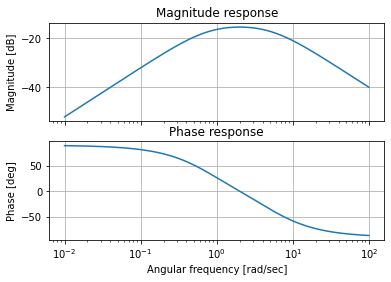

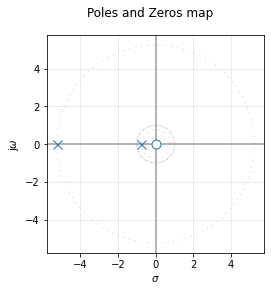

In [3]:
import scipy.signal as sig
import matplotlib as mpl
from splane import *

num=[1,0]
den=[1,6,4]

all_sys=(sig.TransferFunction(num,den))
filter_names=("Filtro")

fig_id, axes_hdl = bodePlot(all_sys, 1, ())
analog_fig_id, analog_axes_hdl = pzmap(all_sys, filter_names, 3, ())

Para $\omega=0$ los polos aportan 0º y el cero en el origen aporta los 90º

Para $\omega=\infty$ los polos y los ceros aportan 90º solo que los polos restan a la fase:

$\frac{\pi}{2}-\frac{\pi}{2}-\frac{\pi}{2}=-\frac{\pi}{2}$

Como vemos corresponde a un circuito pasa banda por lo tanto planteamos el siguiente circuito pasivo:

<img src="./circuito3.png" align="center" width="300" />

cuya transferencia es:

$$T(s)=\frac{\frac{s}{CR}}{s^2+\frac{s}{CR}+\frac{1}{LC}}$$

Comparando las transferecias vemos que $\omega_0^2=2$

$\frac{1}{LC}=4$

$\frac{1}{CR}=6$

si C=1

L=0,25

R=0,166

Vemos que no podemos lograr la atenuación necesaria, entonces desdoblamos la R en dos. 

De modo que ahora debemos bajar la transferencia 6 veces

adpotamos el Valor D (utilizado en el ejercicio anterior=6 de modo que el resistor en serie nos queda de valor 1 y en derivación de $\frac{1}{5}$

Circuito y simulación:


<img src="./simu3.png" align="center" width="400" />

al parecer no cumple la especificación de fase, pero vamos a desnormalizarlo para que trabaje a 1KHz y una norma de impedancia de 1K$\Omega$


<img src="./simu3b.png" align="center" width="400" />

Ahora si vemos que la misma topologia responde a lo pedido.


Conclusiones: En el último ejercicio, al simular en baja frecuencia no parecia que la fase la respetase como lo pedia el enunciado (sí el modulo) pero al trasladarlo (desnormalizarlo) se pudo corroborar el el circuito responde a lo pedido. Al parecer en tan baja frecuencia los componentes en LTspice no son taan ideales. 